# Polynomial regression with regularization

\begin{align}
y = ax + b \\
J(x) = MSE = \frac{1}{m}(y-\dot{y})^2 = \frac{1}{m}(wx-\dot{y}) \\
\frac{\partial{J}}{\partial w} ||x*w-y||^2 \\
=> \frac{\partial{J}}{\partial w} (xw-y)^T(xw-y) \\
=> \frac{\partial{J}}{\partial w} (w^Tx^Txw - 2w^Tx^Ty+y^Ty) \\
=> (2x^Txw - 2x^Ty) \\
=> 2x^T(xw - y) \\
=> (xw - y)x \\
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hyperparameters

In [2]:
POLYNOMIAL_DEGREE = 3

## Initiate data

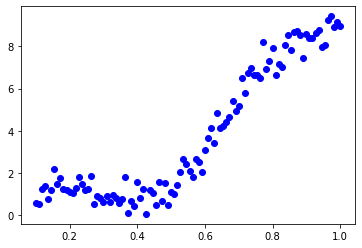

In [3]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(X) + 0.1*np.power(X,2) + 0.5*np.random.randn(100,1)
X /= np.max(X)

plt.plot(X, y, 'bo')

## Split data to train and test

In [4]:
order = np.random.permutation(len(X))
portion = 20
test_x = X[order[:portion]]
test_y = y[order[:portion]]
train_x = X[order[portion:]]
train_y = y[order[portion:]]

## Fit model using train data

In [5]:
class PolynomialRegression():

    def __init__(self, regularization = 0.01, learning_rate = 0.5, tolerance = 1e-5, polynomial_degree = 3):
        self.regularization = regularization
        self.lr = learning_rate
        self.tolerance = tolerance
        self.polynomial_degree = polynomial_degree + 1
        self.w = np.random.randn(polynomial_degree + 1)
    
    def _get_gradient(self, X, y):
        y_predict = X@self.w
        error = y.flatten() - y_predict
        gradient = -(1.0 / len(X)) * error @ X + self.regularization * self.w
        
        return gradient, error@error
    
    def _extend_data(self, data):
        extend_data = np.ones_like(data)

        for i in range(1, self.polynomial_degree):
            extend_data = np.hstack((extend_data, data**i))

        return extend_data

    def fit(self, X, y, verbose = False):
        
        if X is None or y is None:
            raise Exception("X and y must be not None")
        
        X = self._extend_data(X)
        history = []
        
        i = 0
        while True:
            gradient, error = self._get_gradient(X, y)
            history.append(error)
            
            new_w = self.w - self.lr * gradient
            
            if np.sum(abs(new_w - self.w)) < self.tolerance:
                break

            if verbose and i % 100 == 0:
                print("Iteration: %d - Error: %.4f" %(i, error))

            i += 1
            self.w = new_w
            
        return history
            
    def predict(self, X):
        return self._extend_data(X)@self.w

In [6]:
model = PolynomialRegression(polynomial_degree=POLYNOMIAL_DEGREE)
history = model.fit(train_x, train_y, verbose=True)

Iteration: 0 - Error: 1427.6907
Iteration: 100 - Error: 71.5607
Iteration: 200 - Error: 71.6055
Iteration: 300 - Error: 71.6389
Iteration: 400 - Error: 71.6596
Iteration: 500 - Error: 71.6724
Iteration: 600 - Error: 71.6802
Iteration: 700 - Error: 71.6850
Iteration: 800 - Error: 71.6879
Iteration: 900 - Error: 71.6897
Iteration: 1000 - Error: 71.6908
Iteration: 1100 - Error: 71.6914


## Test using test data

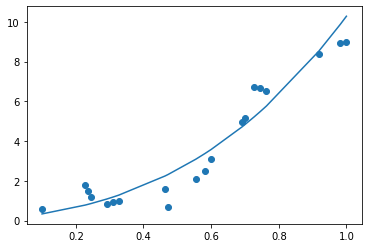

In [7]:
plt.plot(np.sort(test_x.flatten()), np.sort(model.predict(test_x)))
plt.scatter(test_x, test_y)